<a href="https://colab.research.google.com/github/yashasangani/Machine-Learning/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: loading the data

In [ ]:
import numpy as np
data = np.loadtxt('https://files.codingninjas.in/data-6984.csv',delimiter = ',')
x = data[:,0].reshape(-1,1)
y = data[:,1]

In [ ]:
x.shape,y.shape

((100, 1), (100,))

# Step 2 : Perform basic data quality check

In [ ]:
np.isnan(data).sum()

0

In [ ]:
unq, count = np.unique(data, axis=0, return_counts=True)
unq[count>1]

array([], shape=(0, 2), dtype=float64)

# Step 3 : Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 1), (20, 1), (80,), (20,))

# Step 4 : Generating the model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

# Step 5 : Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
print("mean_squared_error = ",MSE)
co_eff = model.coef_
intercept = model.intercept_
print("co_efficient = " ,co_eff[0] ,"\nintercept = ",intercept)

mean_squared_error =  153.20927168160281
co_efficient =  1.1946378687565002 
intercept =  15.076360550264702


# Step 6 : Plot a graph

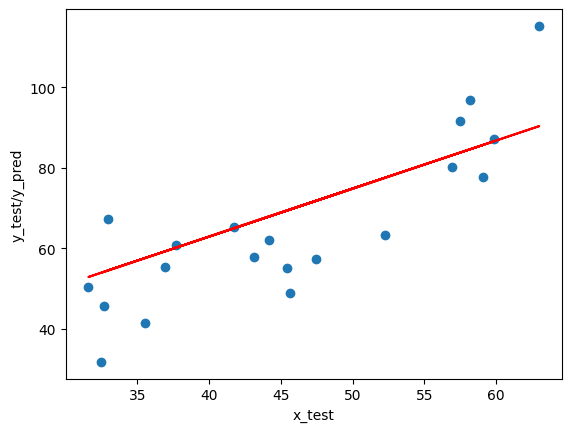

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color = "red")
plt.xlabel("x_test")
plt.ylabel("y_test/y_pred")
plt.show()

# Implementing the Linear Regression from scratch

In [ ]:
import numpy as np
data = np.loadtxt('https://files.codingninjas.in/data-6984.csv',delimiter = ',')
X = data[:,0].reshape(-1,1)
Y = data[:,1]

In [ ]:
X.shape

(100, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((80, 1), (20, 1), (80,), (20,))

In [ ]:
# This function is used to find the best fit line using the training data
def fit(x_train,y_train):
  num = (x_train * y_train).mean() - x_train.mean() * y_train.mean()
  den = (x_train**2).mean() - x_train.mean()**2
  m = num/den
  c = y_train.mean() - m*x_train.mean()
  return m,c

In [ ]:
# This function predicts the value of 'y' corresponding to each 'x'
def predict (x,m,c):
  return m*x + c

In [ ]:
# This function returns the score using the Y(actual) and Y(predited), coefficient of determination
def score(y_test,y_pred):
  num = ((y_test - y_pred)**2).sum()
  den = ((y_test - y_test.mean())**2).sum()
  return 1 - num/den

In [ ]:
def cost(x,y,m,c):
  return ((y - m*x - c)**2).mean()

In [ ]:
m,c = fit(X_train,Y_train)
Y_pred = predict (X_test,m,c)
Score =score(Y_test,Y_pred)


In [ ]:
from sklearn.metrics import mean_squared_error
MSE_self_implement = mean_squared_error(Y_test,Y_pred)

In [ ]:
print("MSE calculated using self implemented code :",MSE_self_implement)
print("MSE calculated using Sklearn's implementation:", MSE)

MSE calculated using self implemented code : 479.5798583008358
MSE calculated using Sklearn's implementation: 153.20927168160281


It can be seen that the Sklearn's implementations gives us a litlle less mean squared error as compared to the self implementation, but they are very close to each other.



# Exercise
Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020


In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv')
df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [21]:
x = df[["year"]]
y = df['per capita income (US$)']


In [23]:
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
alg.fit(x,y)
alg.predict([[2020]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

# Answer is : Canada's per capita income in 2020 will be 41288.69409442

In [22]:
41288